In [ ]:
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.datasets import load_iris, load_wine
import sklearn.metrics as metrics
import warnings
warnings.simplefilter('ignore')

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve,classification_report

import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False

![iris.png](https://drive.google.com/uc?id=1M-rZSCsgOylvAq82HwPdmn2MikZeDQ9a)

In [ ]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
iris_df['species'] = iris['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


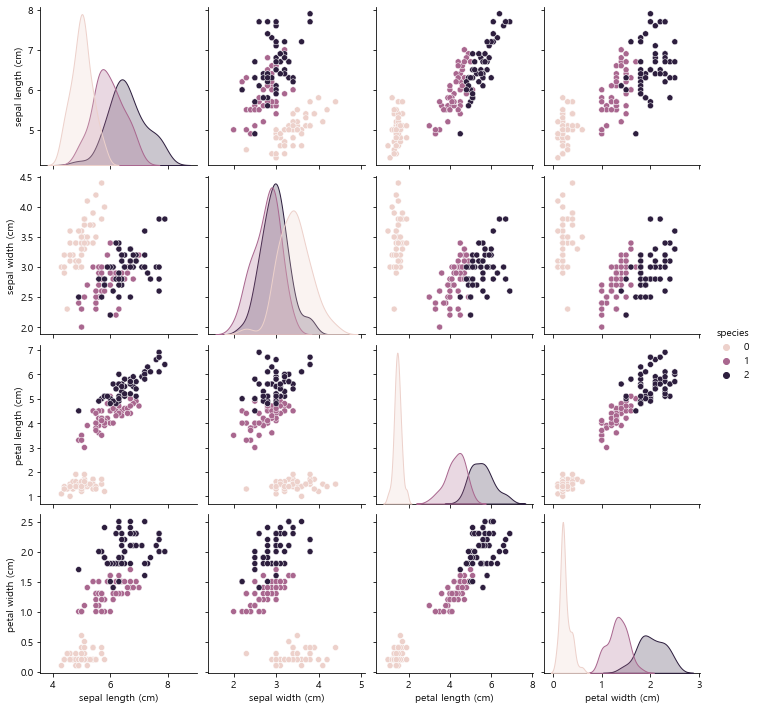

In [ ]:
sns.pairplot(iris_df, hue='species')
plt.show()

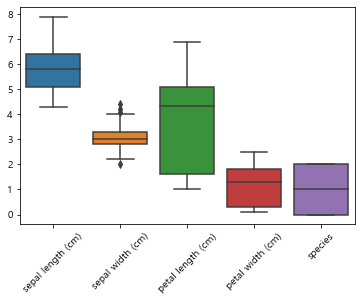

In [ ]:
# box가 길수록 편차가 큼
sns.boxplot(data=iris_df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
x_data = iris_df.iloc[:,:-1]
y_data = iris_df.iloc[:,-1]

x_train,x_test ,y_train, y_test = train_test_split(x_data, y_data, random_state = 1,
                                                   test_size = 0.2 , stratify = y_data)

model_logi = LogisticRegression( multi_class="multinomial") # 다중분류
model_logi.fit(x_train,y_train)

model_logi.score(x_train,y_train)

0.9666666666666667

In [ ]:
model_logi.coef_

# 0에 대한 비중
# 1에 대한 비중
# 2에 대한 비중

array([[-0.5141716 ,  0.77926852, -2.38302007, -0.961001  ],
       [ 0.3008105 , -0.2766293 , -0.15953388, -0.7680851 ],
       [ 0.2133611 , -0.50263922,  2.54255394,  1.72908611]])

In [ ]:
model_logi.intercept_

array([ 10.43737747,   2.92422968, -13.36160715])

In [ ]:
display(model_logi.predict_proba([[2.6,2.9,3.6,1.3]]))
display(model_logi.predict([[2.6,2.9,3.6,1.3]]))

array([[0.54636533, 0.4468982 , 0.00673647]])

array([0])

In [ ]:
z = np.matmul([[2.6,2.9,3.6,1.3]], model_logi.coef_.T) + model_logi.intercept_

# 이제 이 값을 softmax에 넣어줘야 함

In [ ]:
def softmax(x):
    e = np.exp(x)
    print(e/np.sum(e))

In [ ]:
softmax(z)

[[0.54636533 0.4468982  0.00673647]]


In [ ]:
model_logi.predict(x_test)

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1])

In [ ]:
y_test

107    2
9      0
98     1
11     0
43     0
0      0
148    2
111    2
121    2
76     1
16     0
53     1
112    2
62     1
113    2
15     0
102    2
71     1
57     1
127    2
74     1
66     1
37     0
8      0
147    2
106    2
5      0
12     0
56     1
54     1
Name: species, dtype: int32

# 1.연습문제

1. 각각의 종 예측
6.8, 3.0, 5.5, 2.1
6.8, 3.0, 5.5, 2.1

2. confusion matrix, heatmap

3. f1 score

In [ ]:
iris_df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
iris_df['species'] = iris['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
x_data = iris_df.iloc[:,:-1]
y_data = iris_df.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, 
                                                 test_size=0.2, random_state=1, stratify=y_data)

In [ ]:
model_logi = LogisticRegression(multi_class='multinomial')
model_logi.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [ ]:
model_logi.predict([[6.8, 3.0, 5.5, 2.1],[5.8,2.8,5.1,2.4]])

array([2, 2])

<AxesSubplot:>

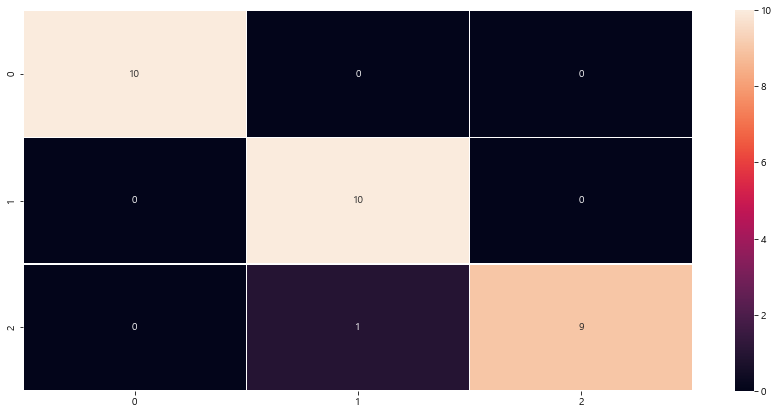

In [ ]:
predict = model_logi.predict(x_test)
cm = confusion_matrix(y_test,predict)

plt.figure(figsize=(15,7))
sns.heatmap(cm,annot=True, linewidth=0.1)

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
precision_score(y_test,predict, average='macro')

0.9696969696969697

---
# 2.연습문제

1. 상관관계, heatmap
2. train,test score
3. test[0]번째데이터를 예측
4. confusion matrix, heatmap
5. f1 score( train, test )

In [ ]:
wine = load_wine()
wine_df = pd.DataFrame(wine['data'], columns = wine['feature_names'])
wine_df['target'] = wine['target']
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


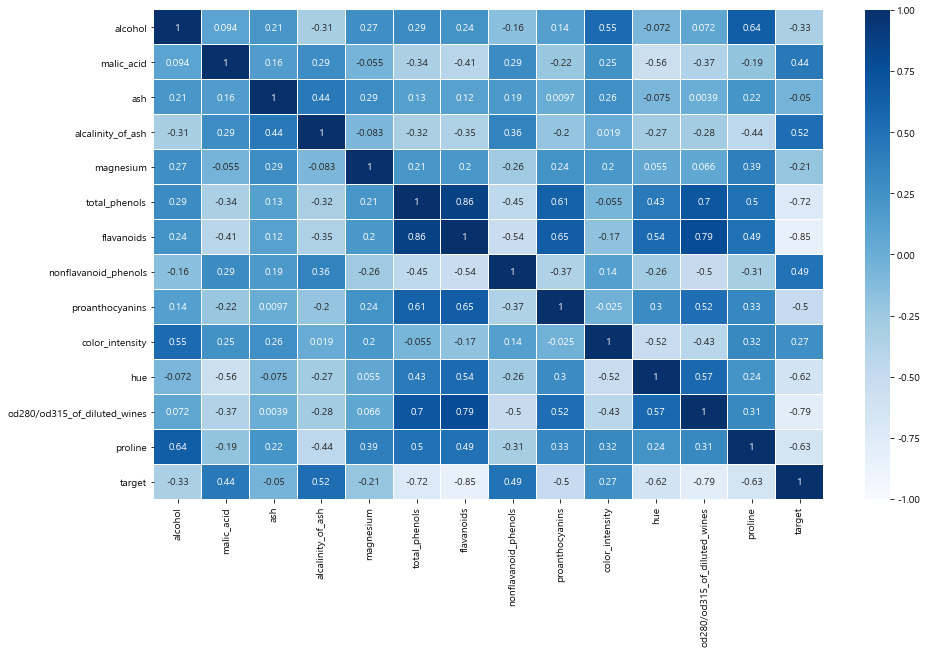

In [ ]:
# 1번 상관관계 heatmap
plt.figure(figsize=(15,9))
sns.heatmap(wine_df.corr(),annot=True, cmap = 'Blues',
           linewidth=0.1,vmin=-1,vmax=1)
plt.show()

In [ ]:
x_data = wine_df.iloc[:,:-1]
y_data = wine_df.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, 
                                                 test_size=0.2, random_state=1, stratify=y_data)

In [ ]:
model_logi = LogisticRegression(multi_class='multinomial')
model_logi.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [ ]:
# 2번 train, test score
print('train : ',model_logi.score(x_train,y_train))
print('test : ',model_logi.score(x_test,y_test))

train :  0.971830985915493
test :  0.8888888888888888


In [ ]:
# 3번 test[0]번째 데이터 예측
predict = model_logi.predict(x_test)
predict[0]

0

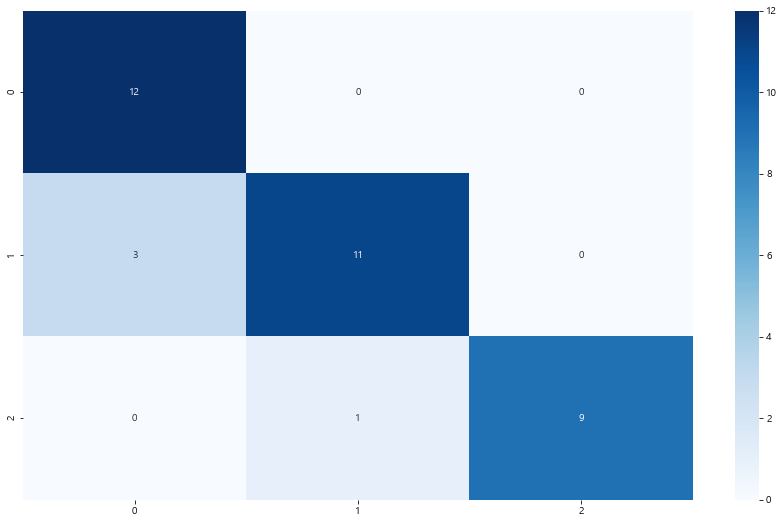

In [ ]:
# 4번 confusion matrix, heatmap

cm = confusion_matrix(y_test, predict)

plt.figure(figsize=(15,9))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

In [ ]:
# 5번 f1 score
f1_score(y_test,predict, average='macro')

0.894137052031789